###**PROJET BIG DATA**
**THEME** : Automatisation de l'extraction de faits à partir de textes (Sujet, prédicat, objet)

#**Analyse et traitement des donnees avec webscraping**

###**Introduction**

L'extraction automatique de triplets sujet-prédicat-objet à partir de textes est une tâche cruciale mais complexe du traitement automatique du langage naturel. Alors que les approches classiques basées sur des règles ont des limites, les techniques d'apprentissage profond offrent des méthodes plus robustes. Ce sujet explore les différentes méthodologies, couvrant les étapes clés comme le prétraitement, l'analyse syntaxique, la reconnaissance d'entités et l'extraction de relations. Un examen des approches par règles, statistiques et neuronales permettra de comprendre leurs forces, faiblesses et applicabilité aux différents types de données textuelles, dans l'optique d'automatiser efficacement cette tâche importante.


##**Importer les packages et les bibliothèques nécessaires :**

In [1]:
## Installation et importation des bibliothèques nécessaires

# Téléchargement du modèle de langue française pour spaCy
!python -m spacy download fr_core_news_sm

# Installation de spaCy
!pip install spacy

# Installation de la bibliothèque NLTK
!pip install nltk

# Installation de la bibliothèque newspaper3k pour le scraping web
!pip install newspaper3k

# Importation des modules nécessaires
import requests  # Pour effectuer des requêtes HTTP
from bs4 import BeautifulSoup  # Pour le scraping HTML
import spacy  # Pour le traitement du langage naturel
import pandas as pd  # Pour la manipulation des données
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des visualisations plus avancées


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 22.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=

##**Charger le modèle de traitement du langage naturel français de SpaCy.**

In [2]:
## chargement du model
nlp = spacy.load("fr_core_news_sm")

##**Definisson l'url du site a traiter On cible le lien du site de presse de senego avec un aticle**

In [15]:
# URL du site Web à scraper
url = "https://senego.com/sonko-et-diomaye-sont-ils-complices-des-forfaitures-de-macky-sall-par-moise-rampino_1698388.html"

# Envoyer une requête HTTP pour récupérer le contenu HTML de la page
response = requests.get(url)
html_content = response.content

# Parser le contenu HTML avec BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
print(soup)  #pour afficher le code html

<!DOCTYPE html>
<html lang="fr-FR"><head><style id="litespeed-ucss">@keyframes fadeIn{0%{opacity:0}to{opacity:1}}@keyframes slideIn{0%{transform:translateY(-50px);opacity:0}to{transform:translateY(0);opacity:1}}:root{--color-primary:#f90;--color-secondary:#f90;--color-menu-bar:#f90;--senego-font-bold:'Graphik Condensed Bold',sans-serif;--senego-font-regular:'Graphik Regular',sans-serif}@font-face{font-display:swap;font-family:"Graphik Condensed Bold";src:url(/wp-content/themes/news/assets/fonts/GraphikCondensed-Bold.ttf)format("truetype");font-weight:400;font-style:normal}@font-face{font-display:swap;font-family:"Graphik Regular";src:url(/wp-content/themes/news/assets/fonts/GraphikRegular.otf)format("opentype");font-weight:400;font-style:normal}@font-face{font-display:swap;font-family:"Graphik Condensed Bold Woff";src:url(/wp-content/themes/news/assets/fonts/Graphik-CondensedBold.woff2)format("woff2");font-weight:700;font-style:normal}@font-face{font-display:swap;font-family:"Graphik B

##**Extraction du titre de l'article**

In [16]:
from newspaper import Article
article=Article(url)
article.download()
article.parse()

In [17]:
# Acceder au titre de l'article
print(article.title)

Sonko et Diomaye sont-ils complices des forfaitures de Macky Sall? (Par Moïse Rampino)*


##**Extraction de l'auteur de l'article**

In [18]:
# Acceder a l'auteur
article.authors # correspont aux auteurs de la page courante


['Khalil Kamara',
 'Sam Le Pirate',
 'Le Peuple',
 'Simon Lourdine',
 'Modou Aliou Diouf',
 'Des Rives Du Lez']

In [19]:
# Accéder à la liste des auteurs de l'article
liste_auteurs = article.authors

# Vérifier si la liste des auteurs n'est pas vide
if liste_auteurs:
    premier_auteur = liste_auteurs[0]
    print("auteur article :", premier_auteur)
else:
    print("Aucun auteur trouvé.")  # accede a l'auteur du present article


auteur article : Khalil Kamara


##**Acceder a la date de publication de 'article**

In [21]:
#aDate de publication et l'heure
article.publish_date

datetime.datetime(2024, 5, 15, 16, 32, 26, tzinfo=tzlocal())

##**L'image de l'article**

In [22]:
article.top_image

'https://senego.com/wp-content/uploads/2024/05/moise-rampino.jpg'

##**Aceder au texte**

In [23]:
# Acceder au corps du texte = contenu de l'article
print(article.text)

Il n’y pas d’audit qui tienne comme précédemment affirmé sur le dernier communiqué du conseil des ministres. Toutes les 151 licences accordées par le régime du Président Macky Sall doivent être annulées.

Lorsqu’il était au niveau de l’opposition, Sonko a toujours prôné le nationalisme et il commence par une souveraineté dans les domaines de la pêche, de l’agriculture, de l’élevage et des industries extractives.

Le Sénégal a les moyens de se procurer 200 bateaux industriels de pêche à raison de 5 milliards de FCFA l’unité. Rien que les 1000 milliards de FCFA du fonds Covid 19 que Macky Sall et ses sangsues ont fait volatiliser dans la nature s’ils sont récupérés peuvent nous permettre d’avoir 200 chalutiers.

Ainsi, il est évident que l’Etat du Sénégal a les pleines capacités d’annuler toutes ces licences (151) pour enfin nationaliser le secteur de la pêche et créer de grandes industries de transformation des produits halieutiques qui pourront permettre à des millions de personnes de 

# **Extraction de triplets sujet-verbe-objet à partir du texte d'un article en utilisant SpaCy**

##**Pretraitement du contenu avec extraction du triplet (Sujet-Predicat-Objet)**

In [24]:
# Texte de l'article est stocke dans la variable texte_article
texte_article = article.text

# Initialiser une liste pour stocker les triplets
triplets = []

# Charger le modèle de traitement du langage naturel SpaCy
nlp = spacy.load("fr_core_news_sm")

# Analyser le texte de l'article avec SpaCy
doc = nlp(texte_article)

# Parcourir les phrases du document
for sentence in doc.sents:
    # Analyser la syntaxe de la phrase
    parsed_sentence = nlp(sentence.text)

    # Extraire les relations sujet-verbe-objet
    for token in parsed_sentence:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            sujet = token.text
            predicat = token.head.lemma_
            objet = None

            for child in token.head.children:
                if child.dep_ == "obj":
                    objet = child.text
                    break

            # Ajouter le triplet à la liste
            triplet = {
                "sujet": sujet,
                "predicat": predicat,
                "objet": objet
            }
            triplets.append(triplet)

# Afficher les triplets extraits
for triplet in triplets:
    print(triplet) # Dictionnaire cree


{'sujet': 'qui', 'predicat': 'tenir', 'objet': None}
{'sujet': 'il', 'predicat': 'commencer', 'objet': None}
{'sujet': 'Sénégal', 'predicat': 'avoir', 'objet': 'moyens'}
{'sujet': 'l’', 'predicat': 'avoir', 'objet': 'pleines'}
{'sujet': 'qui', 'predicat': 'pouvoir', 'objet': None}
{'sujet': 'qui', 'predicat': 'aller', 'objet': None}
{'sujet': 'temps', 'predicat': 'venir', 'objet': None}
{'sujet': 'Ils', 'predicat': 'faire', 'objet': 'milliers'}
{'sujet': 'pêche', 'predicat': 'rapporter', 'objet': None}
{'sujet': 'Président', 'predicat': 'sembler', 'objet': None}
{'sujet': 'on', 'predicat': 'acheter', 'objet': 'chalutiers'}
{'sujet': 'n’', 'predicat': 'attendre', 'objet': None}
{'sujet': '-ils', 'predicat': 'attendre', 'objet': None}
{'sujet': 'nous', 'predicat': 'transformer', 'objet': 'produits'}
{'sujet': 'ambassadeur', 'predicat': 'affirmer', 'objet': None}
{'sujet': 'Jean', 'predicat': 'affirmer', 'objet': None}
{'sujet': 'il', 'predicat': 'affirmer', 'objet': None}
{'sujet': 'n’',

##**Creation d'un Dataframe a partir de la liste de dictionnaire**

In [25]:
df_triplets = pd.DataFrame(triplets)
# Spécifier les index pour le DataFrame
df_triplets.index.name = 'triplet'

# Ajuster la largeur des colonnes pour éviter le troncage
pd.set_option('display.max_colwidth', None)

# nommer les colonnes pour une clarté accrue
df_triplets.columns = ['Sujet', 'Prédicat', 'Objet']

# Afficher le DataFrame avec les améliorations

display(df_triplets)

,Sujet,Prédicat,Objet
triplet,,,
0,qui,tenir,None
1,il,commencer,None
2,Sénégal,avoir,moyens
3,l’,avoir,pleines
4,qui,pouvoir,None
5,qui,aller,None
6,temps,venir,None
7,Ils,faire,milliers
8,pêche,rapporter,None


#**Analyse Exploratoire et Visualisation**

               Sujet     Prédicat       Objet
Triplet                                      
0                qui        tenir        None
1                 il    commencer        None
2            Sénégal        avoir      moyens
3                 l’        avoir     pleines
4                qui      pouvoir        None
5                qui        aller        None
6              temps        venir        None
7                Ils        faire    milliers
8              pêche    rapporter        None
9          Président      sembler        None
10                on      acheter  chalutiers
11                n’     attendre        None
12              -ils     attendre        None
13              nous  transformer    produits
14       ambassadeur     affirmer        None
15              Jean     affirmer        None
16                il     affirmer        None
17                n’      annuler    licences
18               ils        avoir        None
19               qui       porter 

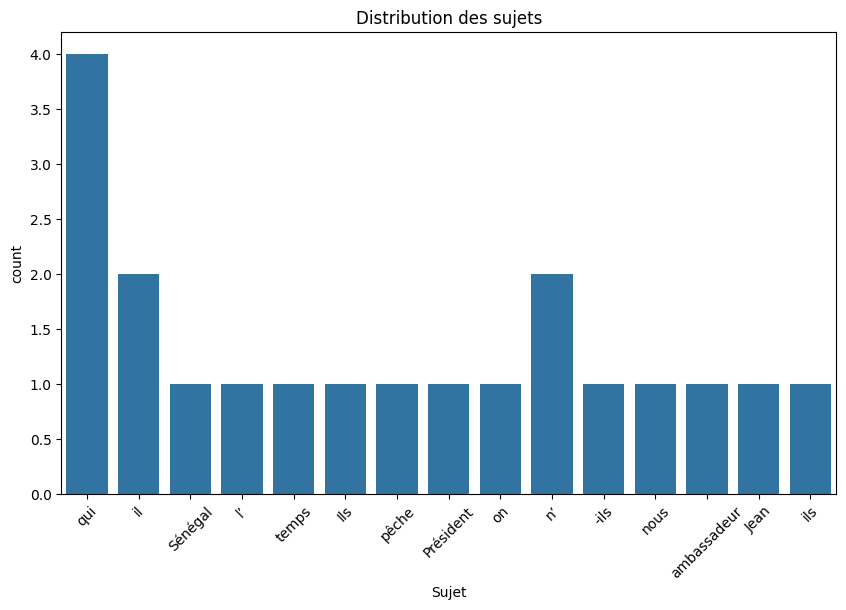

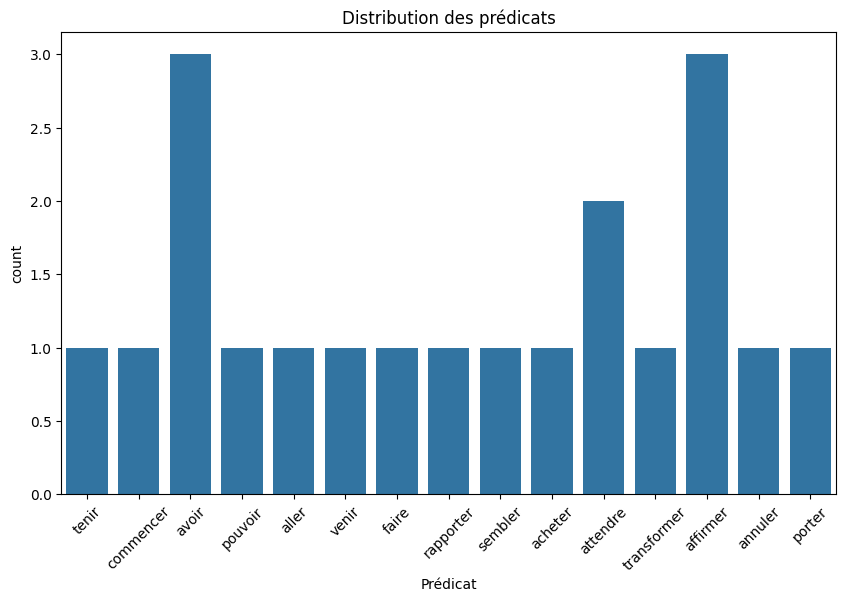

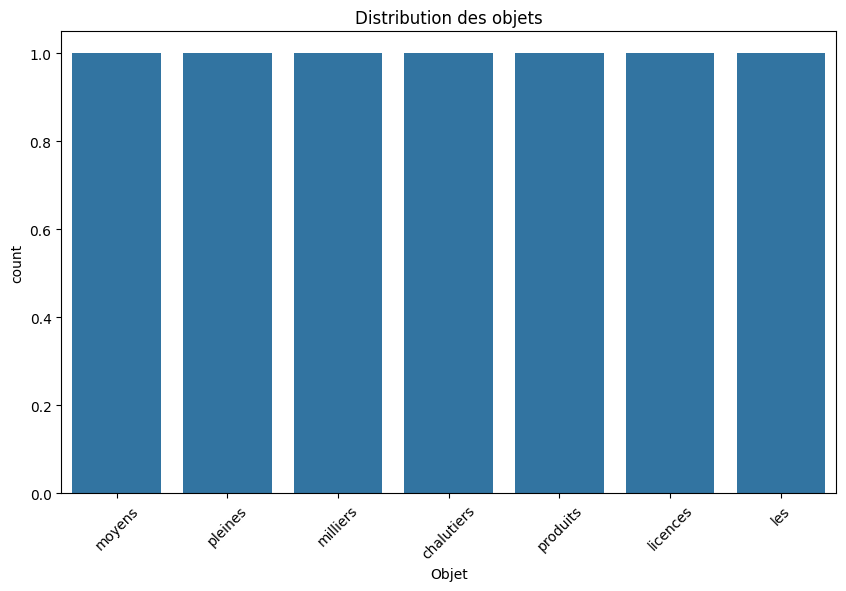

In [26]:

# Spécifier les index pour le DataFrame
df_triplets.index.name = 'Triplet'

# Ajuster la largeur des colonnes pour éviter le troncage
pd.set_option('display.max_colwidth', None)

# Nommer les colonnes pour une clarté accrue
df_triplets.columns = ['Sujet', 'Prédicat', 'Objet']

# Afficher le DataFrame avec les améliorations
print(df_triplets)

# Analyse statistique des triplets
print(f"Nombre total de triplets : {len(df_triplets)}")
print(f"Sujets les plus fréquents : \n{df_triplets['Sujet'].value_counts().head()}")
print(f"Prédicats les plus fréquents : \n{df_triplets['Prédicat'].value_counts().head()}")
print(f"Objets les plus fréquents : \n{df_triplets['Objet'].value_counts().head()}")

# Visualisation des triplets
plt.figure(figsize=(10, 6))
sns.countplot(data=df_triplets, x='Sujet')
plt.xticks(rotation=45)
plt.title("Distribution des sujets")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_triplets, x='Prédicat')
plt.xticks(rotation=45)
plt.title("Distribution des prédicats")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_triplets, x='Objet')
plt.xticks(rotation=45)
plt.title("Distribution des objets")
plt.show()